In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4380\3167909760.py:2: SyntaxWarning: invalid escape sequence '\i'
  image_path = "Testdata\im0010.ppm"


(-0.5, 699.5, 604.5, -0.5)

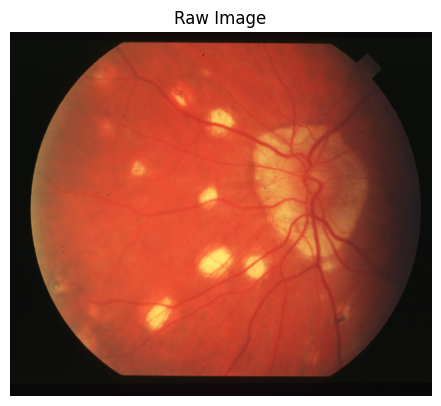

In [12]:
# Bagian 2: Membaca gambar dari path yang diberikan
image_path = "Testdata\im0010.ppm"
raw_image = cv2.imread(image_path)

# Mengubah gambar dari BGR (OpenCV format) ke RGB (matplotlib format)
raw_image_rgb = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

# Bagian 3: Menampilkan gambar asli (Raw Image)
plt.figure(figsize=(25, 10))
plt.subplot(1, 4, 1)
plt.title("Raw Image")
plt.imshow(raw_image_rgb)
plt.axis('off')

(-0.5, 699.5, 604.5, -0.5)

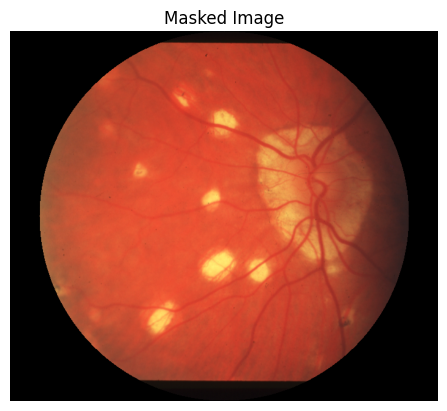

In [13]:
# Bagian 4: Melakukan masking pada gambar
# Misalkan kita ingin membuat masker bundar di sekitar bagian tengah gambar

# Membuat masker dengan ukuran yang sama dengan gambar
mask = np.zeros(raw_image.shape[:2], dtype="uint8")

# Mendefinisikan pusat dan radius dari masker bundar
(h, w) = raw_image.shape[:2]
center = (w // 2, h // 2)
radius = min(center[0], center[1], w-center[0], h-center[1])

# Menggambar lingkaran putih di tengah masker hitam (0) dengan radius tertentu
for i in range(h):
    for j in range(w):
        if (i - center[1])**2 + (j - center[0])**2 <= radius**2:
            mask[i, j] = 255

# Terapkan masker pada gambar
masked_image = cv2.bitwise_and(raw_image_rgb, raw_image_rgb, mask=mask)

# Bagian 5: Menampilkan gambar yang telah di-mask
plt.subplot(1, 1, 1)
plt.title("Masked Image")
plt.imshow(masked_image)
plt.axis('off')


(-0.5, 699.5, 604.5, -0.5)

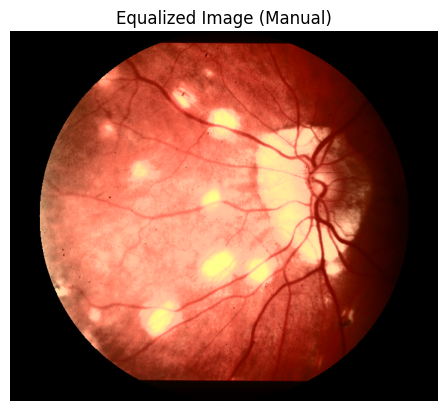

In [14]:
# Bagian 6: Melakukan histogram equalization secara manual pada gambar

# Konversi gambar RGB ke YCrCb
ycrcb_image = cv2.cvtColor(masked_image, cv2.COLOR_RGB2YCrCb)

# Mengambil channel Y (luminance)
y_channel = ycrcb_image[:, :, 0]

# Menghitung histogram dari channel Y
hist, _ = np.histogram(y_channel.flatten(), 256, [0, 256])

# Menghitung CDF (Cumulative Distribution Function)
cdf = hist.cumsum()

# Normalisasi CDF
cdf_m = np.ma.masked_equal(cdf, 0)  # Masking untuk menghitung CDF yang valid
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Menggunakan CDF untuk remap nilai piksel
y_channel_equalized = cdf[y_channel]

# Menggabungkan kembali channel Y yang telah di-equalize dengan channel Cr dan Cb
ycrcb_image[:, :, 0] = y_channel_equalized

# Konversi kembali ke RGB
equalized_image = cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB)

# Bagian 7: Menampilkan gambar yang telah di-equalize
plt.subplot(1, 1, 1)
plt.title("Equalized Image (Manual)")
plt.imshow(equalized_image)
plt.axis('off')


(-0.5, 699.5, 604.5, -0.5)

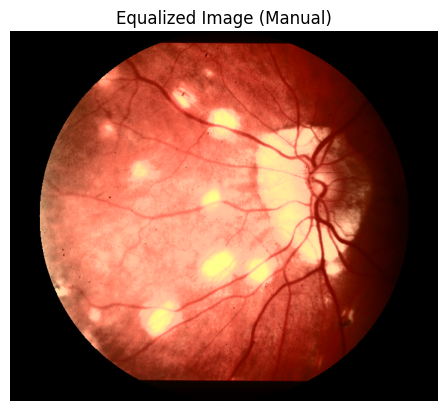

In [15]:
#Melakukan histogram equalization secara manual pada gambar

# Konversi gambar RGB ke YCrCb
ycrcb_image = cv2.cvtColor(masked_image, cv2.COLOR_RGB2YCrCb)

# Mengambil channel Y (luminance)
y_channel = ycrcb_image[:, :, 0]

# Menghitung histogram dari channel Y
hist, _ = np.histogram(y_channel.flatten(), 256, [0, 256])

# Menghitung CDF (Cumulative Distribution Function)
cdf = hist.cumsum()

# Normalisasi CDF
cdf_m = np.ma.masked_equal(cdf, 0)  # Masking untuk menghitung CDF yang valid
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Menggunakan CDF untuk remap nilai piksel
y_channel_equalized = cdf[y_channel]

# Menggabungkan kembali channel Y yang telah di-equalize dengan channel Cr dan Cb
ycrcb_image[:, :, 0] = y_channel_equalized

# Konversi kembali ke RGB
equalized_image = cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB)

# Bagian 7: Menampilkan gambar yang telah di-equalize
plt.subplot(1, 1, 1)
plt.title("Equalized Image (Manual)")
plt.imshow(equalized_image)
plt.axis('off')


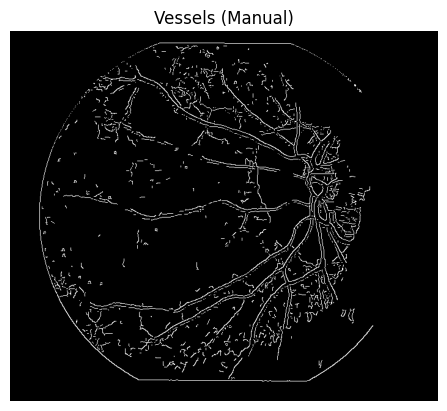

In [16]:
# Bagian 8: Ekstraksi pembuluh darah secara manual

# Mengubah gambar equalized ke grayscale
gray_image = cv2.cvtColor(equalized_image, cv2.COLOR_RGB2GRAY)

# Melakukan Gaussian blur untuk mengurangi noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Deteksi tepi secara manual
def manual_canny_edge_detector(image, low_threshold, high_threshold):
    # Sobel kernel untuk menghitung gradien di arah x dan y
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Menghitung gradien di arah x dan y
    grad_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)

    # Menghitung magnitudo dan arah gradien
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    angle = np.arctan2(grad_y, grad_x) * 180 / np.pi
    angle = np.abs(angle)

    # Non-maximum suppression
    nms = np.zeros_like(magnitude)
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = magnitude[i, j + 1]
                r = magnitude[i, j - 1]
            elif 22.5 <= angle[i, j] < 67.5:
                q = magnitude[i + 1, j - 1]
                r = magnitude[i - 1, j + 1]
            elif 67.5 <= angle[i, j] < 112.5:
                q = magnitude[i + 1, j]
                r = magnitude[i - 1, j]
            else:
                q = magnitude[i - 1, j - 1]
                r = magnitude[i + 1, j + 1]

            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                nms[i, j] = magnitude[i, j]
            else:
                nms[i, j] = 0

    # Thresholding
    strong_edge = 255
    weak_edge = 50
    edges = np.zeros_like(nms)
    strong_i, strong_j = np.where(nms >= high_threshold)
    weak_i, weak_j = np.where((nms < high_threshold) & (nms >= low_threshold))

    edges[strong_i, strong_j] = strong_edge
    edges[weak_i, weak_j] = weak_edge

    # Hysteresis
    for i in range(1, edges.shape[0] - 1):
        for j in range(1, edges.shape[1] - 1):
            if edges[i, j] == weak_edge:
                if ((edges[i + 1, j - 1:j + 2] == strong_edge).any() or
                    (edges[i - 1, j - 1:j + 2] == strong_edge).any() or
                    (edges[i, [j - 1, j + 1]] == strong_edge).any()):
                    edges[i, j] = strong_edge
                else:
                    edges[i, j] = 0

    return edges

# Menggunakan detektor tepi manual
vessel_image = manual_canny_edge_detector(blurred_image, 30, 50)

# Bagian 9: Menampilkan gambar hasil ekstraksi pembuluh darah
plt.subplot(1, 1, 1)
plt.title("Vessels (Manual)")
plt.imshow(vessel_image, cmap='gray')
plt.axis('off')

# Menampilkan semua gambar
plt.show()


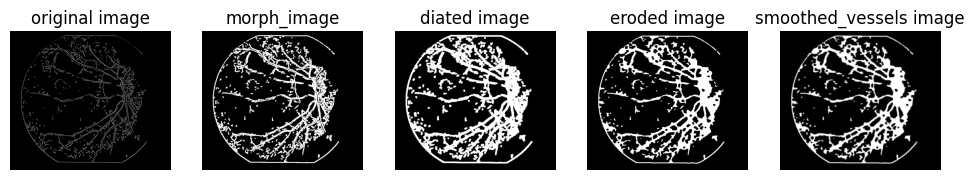

In [17]:
# Bagian 8.1: Operasi morfologi untuk memperbaiki hasil ekstraksi pembuluh darah
# Kernel untuk operasi morfologi
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))

morph_image = cv2.morphologyEx(vessel_image, cv2.MORPH_GRADIENT, kernel)
# Dilasi untuk memperluas tepi pembuluh darah
dilated = cv2.dilate(morph_image, kernel, iterations=1)

# Closing untuk menutupi celah kecil di pembuluh darah
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel, iterations=1)

# Erosi untuk menghilangkan noise kecil
eroded = cv2.erode(closing, kernel, iterations=1)

# Menggunakan GaussianBlur untuk menghaluskan hasil
smoothed_vessels = cv2.GaussianBlur(eroded, (5, 5), 0)

plt.figure(figsize=(12, 4))
# Bagian 9: Menampilkan gambar hasil ekstraksi pembuluh darah
plt.subplot(1, 5,1)
plt.title("original image")
plt.imshow(vessel_image, cmap='gray')
plt.axis('off')

# Bagian 9: Menampilkan gambar hasil ekstraksi pembuluh darah
plt.subplot(1, 5,2)
plt.title("morph_image")
plt.imshow(morph_image, cmap='gray')
plt.axis('off')

# Bagian 9: Menampilkan gambar hasil ekstraksi pembuluh darah
plt.subplot(1, 5,3)
plt.title("diated image")
plt.imshow(dilated, cmap='gray')
plt.axis('off')

# Bagian 9: Menampilkan gambar hasil ekstraksi pembuluh darah
plt.subplot(1, 5,4)
plt.title("eroded image")
plt.imshow(eroded, cmap='gray')
plt.axis('off')


# Bagian 9: Menampilkan gambar hasil ekstraksi pembuluh darah
plt.subplot(1, 5,5)
plt.title("smoothed_vessels image")
plt.imshow(smoothed_vessels, cmap='gray')
plt.axis('off')

# Menampilkan semua gambar
plt.show()